In [1]:
# %load kinase_single_well_spectra_experiment


# get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


# In[13]:


import assaytools


# In[14]:


from assaytools import platereader


filenames = ['EEG_single_well_conc_0_20181211_102208.xml',
            'EEG_single_well_conc_1_20181211_103902.xml',
            'EEG_single_well_conc_2_20181211_105422.xml',
            'EEG_single_well_conc_3_20181211_110944.xml',
            'EEG_single_well_conc_4_20181211_112503.xml',
            'EEG_single_well_conc_5_20181211_114025.xml',
            'EEG_single_well_conc_6_20181211_115549.xml',
            'EEG_single_well_conc_7_20181211_121112.xml',
            'EEG_single_well_conc_8_20181211_122635.xml',
            'EEG_single_well_conc_9_20181211_124158.xml',
            'EEG_single_well_conc_10_20181211_125721.xml',
            'EEG_single_well_conc_11_20181211_131248.xml',
            'EEG_single_well_conc_12_20181211_132811.xml',
            'EEG_single_well_conc_13_20181211_134335.xml',
            'EEG_single_well_conc_14_20181211_135856.xml',
            'EEG_single_well_conc_15_20181211_141420.xml',
            'EEG_single_well_conc_16_20181211_142951.xml',]

datapath = 'infinite_results'


# In[16]:


concentrations = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])


# In[17]:

reads = list()
nreads = len(filenames)
for read in range(nreads):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads.append(read)


# In[18]:


plate_layout = pd.read_excel('20181026_plate_layout_for_binding_assay.xlsx', header=None)
plate_layout = plate_layout.loc[:, 0:1]
plate_layout.columns = ['well', 'name']
if len(list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')) > 0:
    list(plate_layout[plate_layout.well == 'A1'].name)[0].split('_')

In [2]:
nrows = 8
ncols = 12
index = 0

label = 'ex280_scan_top_gain100'

title = 'Specta Reads at 280nm'
data = np.zeros([nrows, ncols, nreads, 4], np.float64)
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        x_values = list(reads[0][label][well].keys())
        measurements = [list(reads[i][label][well].values()) for i in range(nreads)]
        for i in range(nreads):
            measurements[i] = [x if x != 'OVER' else 0 for x in measurements[i]]
        data[row_index,col_index,:] = np.array(measurements)
        print(data[row_index,col_index,:])
        

[[  362.   186.   113.   107.]
 [  736.   595.   372.   242.]
 [ 1224.  1102.   709.   429.]
 [ 1989.  1967.  1258.   719.]
 [ 4530.  3881.  2264.  1200.]
 [ 4343.  4524.  2854.  1543.]
 [ 5427.  5734.  3649.  1943.]
 [ 5993.  6342.  4023.  2138.]
 [ 6776.  7222.  4543.  2384.]
 [ 7510.  7982.  5171.  2837.]
 [ 8175.  8788.  5564.  2935.]
 [ 8690.  9335.  5926.  3034.]
 [ 9239.  9917.  6352.  3241.]
 [ 9583. 10335.  6618.  3386.]
 [10063. 11031.  6905.  3597.]
 [10571. 11299.  7168.  3656.]
 [10535. 11447.  7162.  3688.]]
[[ 435.  219.  133.  165.]
 [ 445.  231.  145.  160.]
 [ 454.  244.  151.  162.]
 [ 468.  249.  159.  159.]
 [ 476.  242.  157.  160.]
 [ 492.  257.  164.  167.]
 [ 510.  262.  161.  171.]
 [ 503.  267.  165.  168.]
 [ 502.  272.  178.  176.]
 [ 519.  307.  220.  214.]
 [ 554.  355.  256.  235.]
 [ 640.  511.  396.  324.]
 [ 826.  815.  671.  491.]
 [1052. 1205.  982.  698.]
 [1268. 1568. 1313.  884.]
 [1523. 1983. 1646. 1083.]
 [1906. 2590. 2096. 1345.]]
[[ 411.  200

## Plot fluorescence across all 4 wavelengths

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/Applications/miniconda3/envs/assayt

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/Applications/miniconda3/envs/assayt

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)
/Applications/miniconda3/envs/assayt

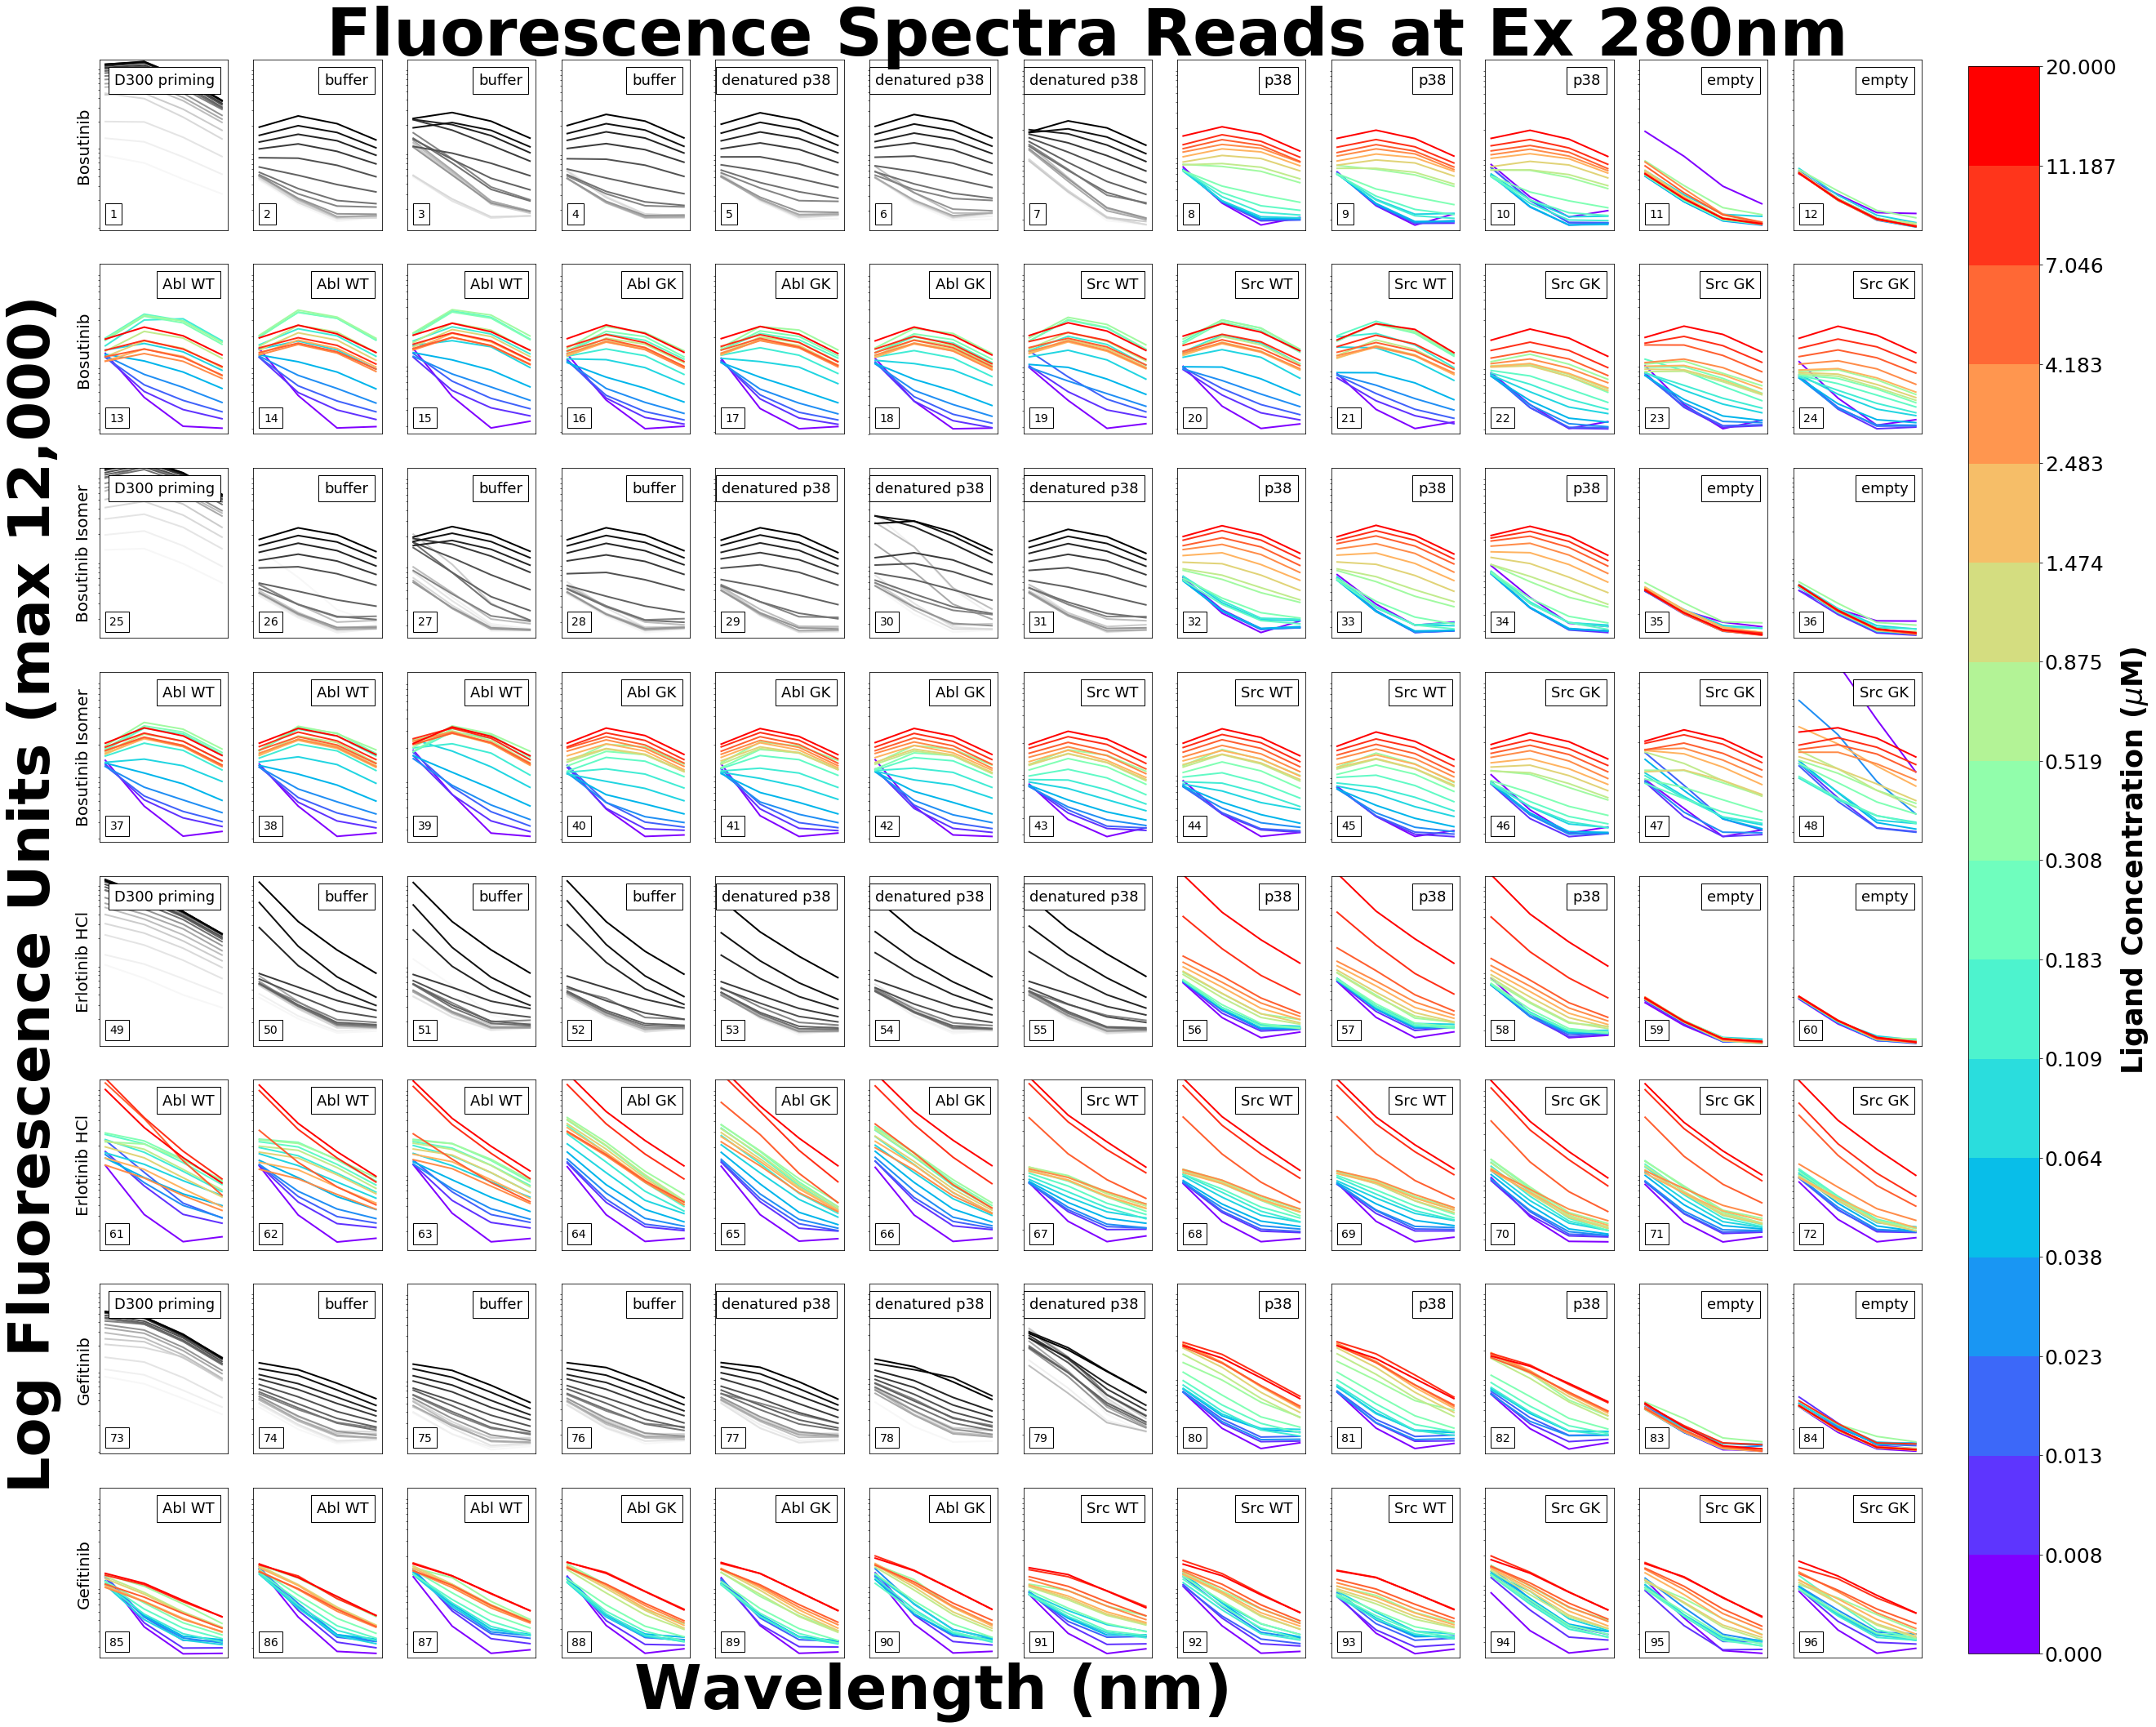

In [3]:

# In[25]:

nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

label = 'ex280_scan_top_gain100'
title = 'Fluorescence Spectra Reads at Ex 280nm'


# ymax = data.max().max().max()
xmax = max(list(reads[0][label][well].keys()))
xmin = min(list(reads[0][label][well].keys()))
c = list(concentrations)

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            gray = cm.Greys(np.linspace(0,1,17))
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming', 'denatured p38']:
                 color=cm.Greys(np.linspace(0,1,17))
            else:
                color=cm.rainbow(np.linspace(0,1,17))
            for read, c in zip(data[row_index,col_index,:,:], color):
                plt.semilogy(x_values, read, c=c, linewidth=2);

            plt.xticks([]);
            plt.yticks([]);
            plt.ylim(0, 12000)
            # label subplots with contents of wells and index # 
            if len(list(plate_layout[plate_layout.well == well].name)) > 0:
                anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
                ax.add_artist(anchored_text)
            if index == 89:
                 plt.xlabel('Wavelength (nm)', fontsize=75, fontweight='bold')
            if index == 6:
                plt.title(title, loc='center', fontsize=80, fontweight='bold')
            if index == 85:
                axis = plt.gca()
                plt.ylabel('Log Fluorescence Units (max 12,000)', fontsize=70, fontweight='bold')
                axis.yaxis.set_label_coords(-1.5,4.5)
                
            # ligand labels
            if index == 12 or index == 0:
                plt.ylabel('Bosutinib', fontsize=20)
            if index == 24 or index == 36:
                plt.ylabel('Bosutinib Isomer', fontsize=20)
            if index == 48 or index == 60:
                plt.ylabel('Erlotinib HCl', fontsize=20)
            if index == 72 or index == 84:
                plt.ylabel('Gefitinib', fontsize=20)

            index += 1
            anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
            ax.add_artist(anchored_text2)
            
cax = fig.add_axes([.92, 0.127, 0.03, 0.75])

micro_concentrations = np.multiply(concentrations, 1e6)
norm = matplotlib.colors.BoundaryNorm(micro_concentrations, cm.rainbow.N)
conc_labels = ['{0:.3f}'.format(x) for x in micro_concentrations]
cb = matplotlib.colorbar.ColorbarBase(cax, cmap='rainbow', norm=norm, ticks=micro_concentrations, boundaries=micro_concentrations)
cb.set_label('Ligand Concentration ($\mu$M)', fontsize=35, fontweight='bold')
cb.ax.tick_params(labelsize=25)
cb.ax.set_yticklabels(conc_labels)


fig.savefig('20181211_single_well_spectra_log_y.pdf', bbox_inches='tight', dpi=300)

## Plot fluorescence at 480 nm across all concentrations

In [4]:
nrows = 8
ncols = 12
index = 0

label = 'ex280_scan_top_gain100'

title = 'Specta Reads at 280nm'
data = np.zeros([nrows, ncols, nreads, 4], np.float64)
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        x_values = list(reads[0][label][well].keys())
        measurements = [list(reads[i][label][well].values()) for i in range(nreads)]
        for i in range(nreads):
            measurements[i] = [x if x != 'OVER' else 0 for x in measurements[i]]
        data[row_index,col_index,:] = np.array(measurements)
        print(well)
        print(measurements)


A1
[['362', '186', '113', '107'], ['736', '595', '372', '242'], ['1224', '1102', '709', '429'], ['1989', '1967', '1258', '719'], ['4530', '3881', '2264', '1200'], ['4343', '4524', '2854', '1543'], ['5427', '5734', '3649', '1943'], ['5993', '6342', '4023', '2138'], ['6776', '7222', '4543', '2384'], ['7510', '7982', '5171', '2837'], ['8175', '8788', '5564', '2935'], ['8690', '9335', '5926', '3034'], ['9239', '9917', '6352', '3241'], ['9583', '10335', '6618', '3386'], ['10063', '11031', '6905', '3597'], ['10571', '11299', '7168', '3656'], ['10535', '11447', '7162', '3688']]
A2
[['435', '219', '133', '165'], ['445', '231', '145', '160'], ['454', '244', '151', '162'], ['468', '249', '159', '159'], ['476', '242', '157', '160'], ['492', '257', '164', '167'], ['510', '262', '161', '171'], ['503', '267', '165', '168'], ['502', '272', '178', '176'], ['519', '307', '220', '214'], ['554', '355', '256', '235'], ['640', '511', '396', '324'], ['826', '815', '671', '491'], ['1052', '1205', '982', '698

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

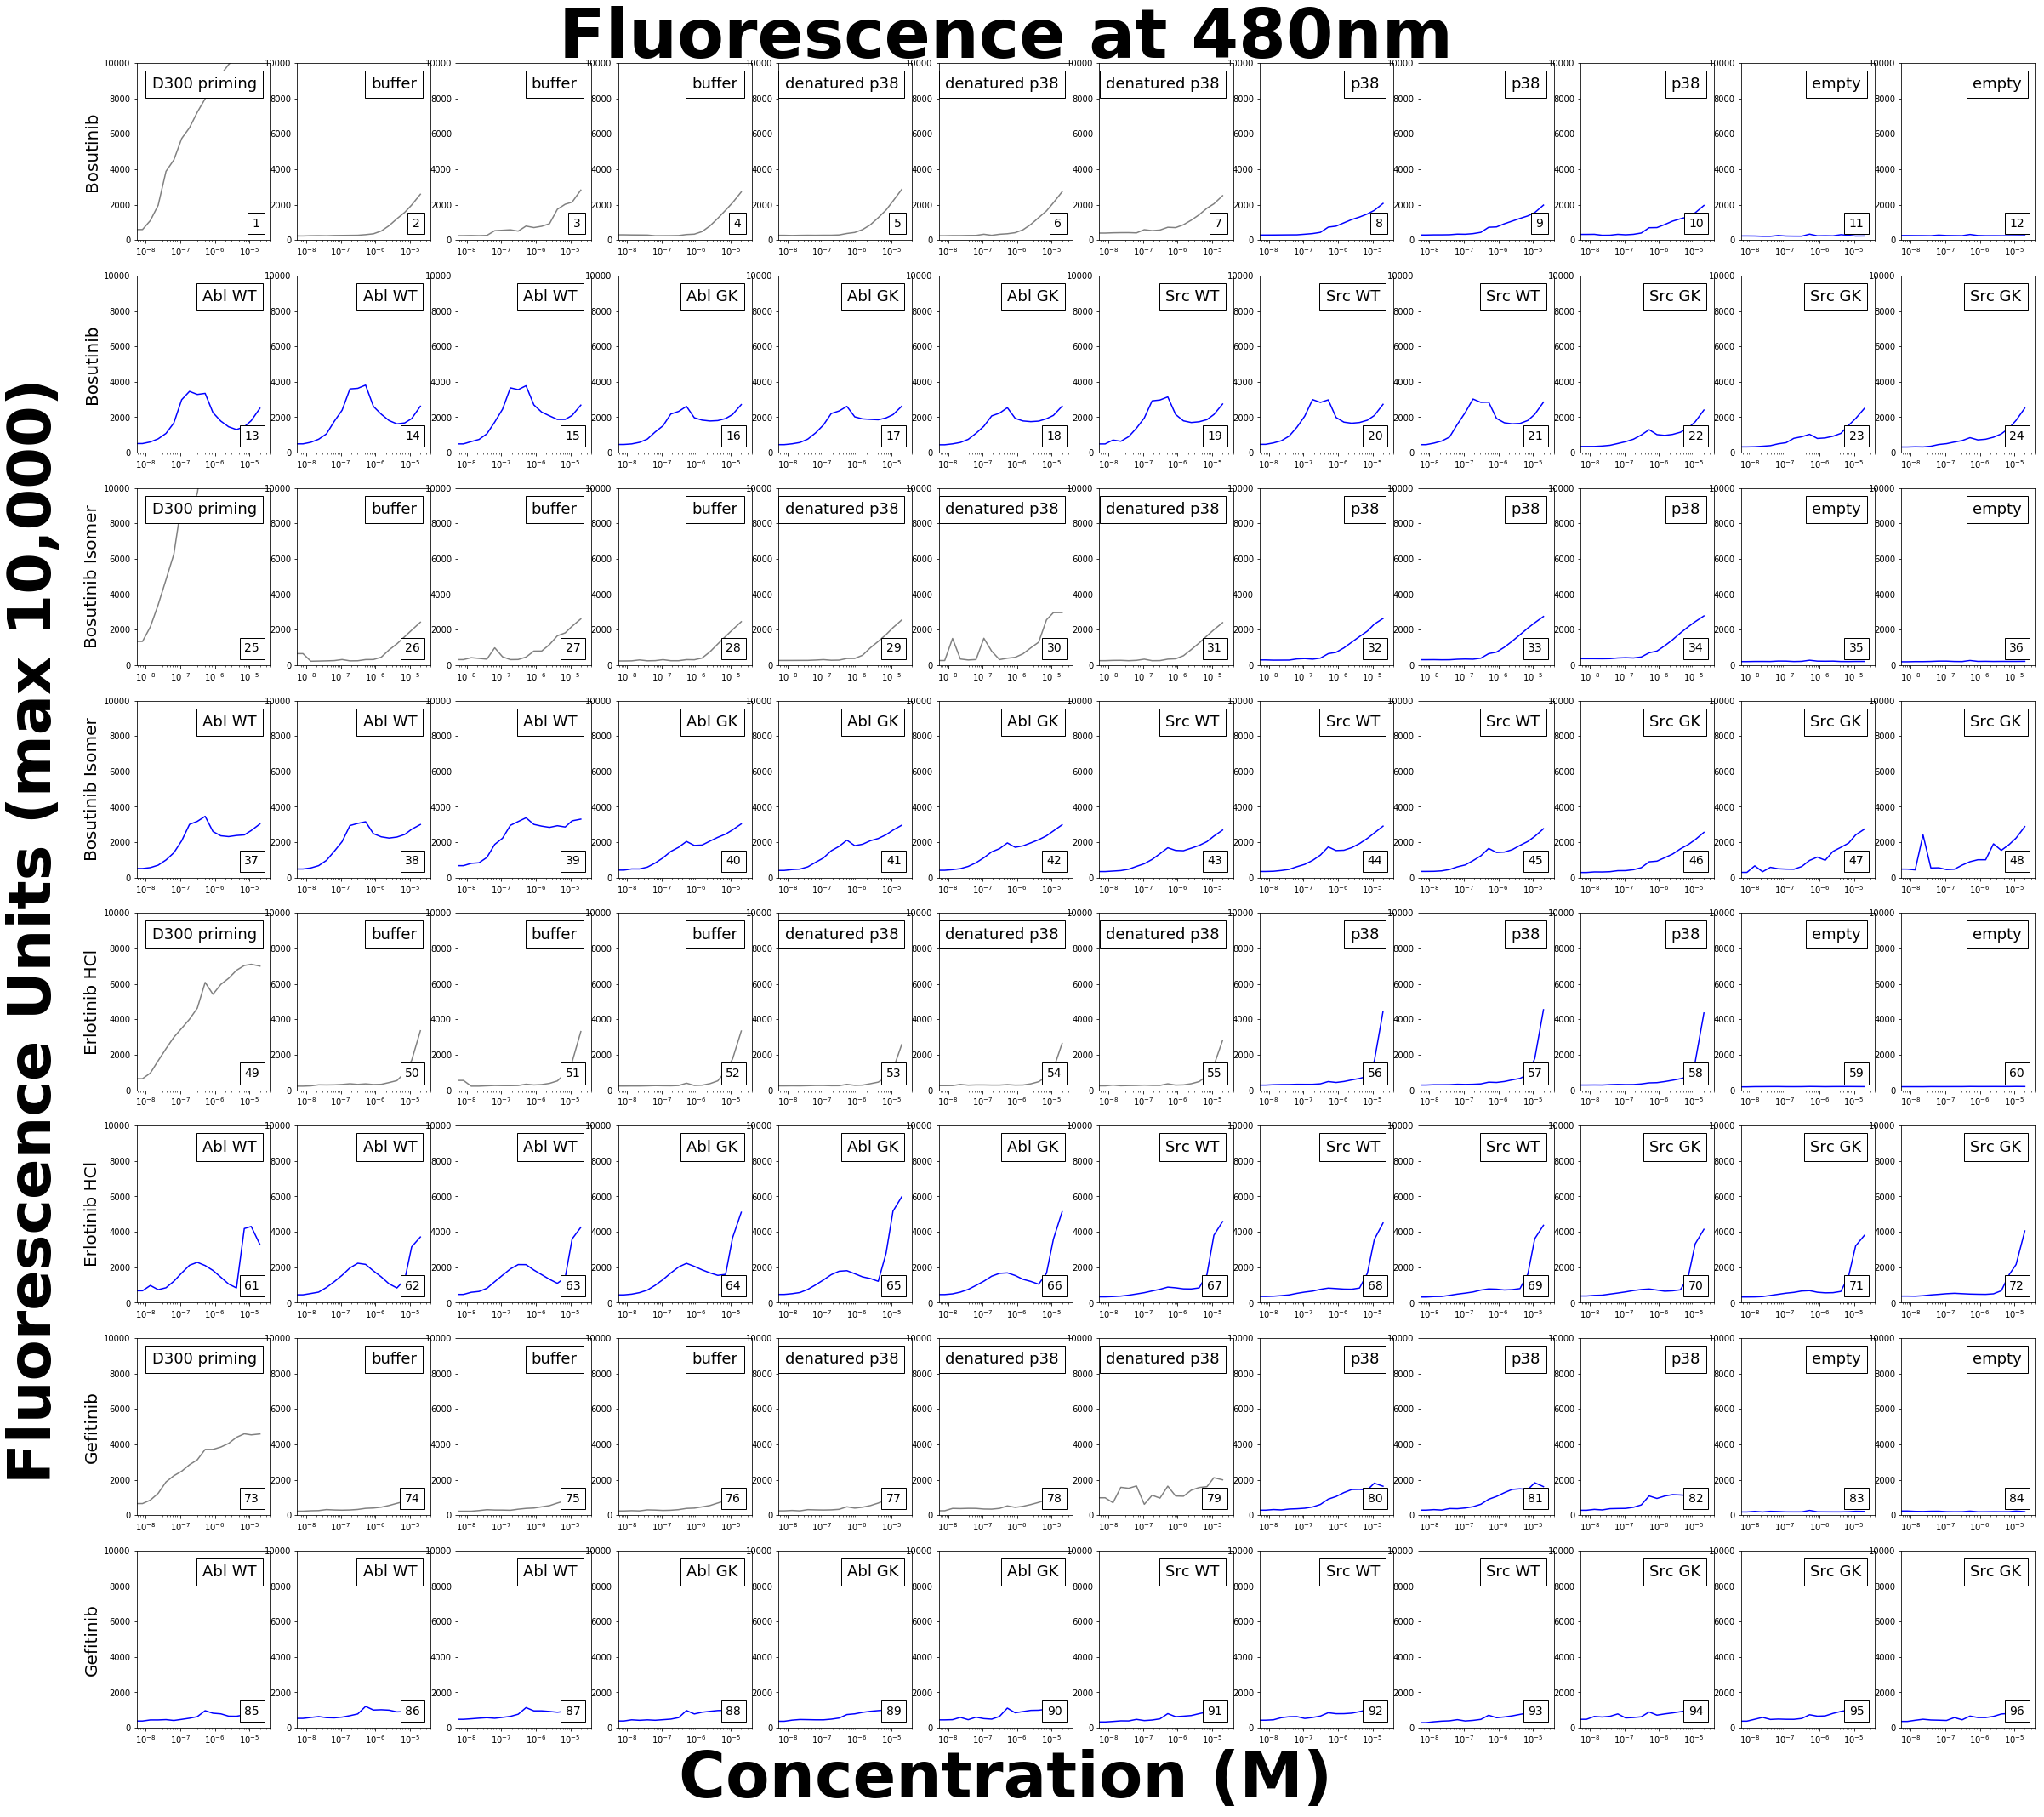

In [5]:
### plot at one wavelength, 480 nm

nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

label = 'ex280_scan_top_gain100'
title = 'Fluorescence at 480nm'

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        x_values = concentrations
        fluo_values = [list(reads[i][label][well].values())[1] for i in range(nreads)]
        fluo_values = [float(i) for i in fluo_values]
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            gray = cm.Greys(np.linspace(0,1,17))
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming', 'denatured p38']:
                 color='0.5'
            else:
                color= 'b'
            plt.semilogx(x_values, fluo_values, color = color)

            plt.xlim(0,4e-5)
            plt.ylim(0,10000)
            plt.tick_params(axis='both', which='major', labelsize=10)

            # label subplots with contents of wells and index # 
            if len(list(plate_layout[plate_layout.well == well].name)) > 0:
                anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
                ax.add_artist(anchored_text)
            if index == 89:
                 plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
            if index == 5:
                plt.title(title, loc='center', fontsize=80, fontweight='bold')
            if index == 85:
                axis = plt.gca()
                plt.ylabel('Fluorescence Units (max 10,000)', fontsize=70, fontweight='bold')
                axis.yaxis.set_label_coords(-1.75,4.5)
                
            # ligand labels
            if index == 12 or index == 0:
                plt.ylabel('Bosutinib', fontsize=20)
            if index == 24 or index == 36:
                plt.ylabel('Bosutinib Isomer', fontsize=20)
            if index == 48 or index == 60:
                plt.ylabel('Erlotinib HCl', fontsize=20)
            if index == 72 or index == 84:
                plt.ylabel('Gefitinib', fontsize=20)

            index += 1
            anchored_text2 = AnchoredText('%s' % (index),  loc=4, prop=dict(size=14))
            ax.add_artist(anchored_text2)

            
fig.savefig('20181211_single_well_spectra_fluorescence_480.pdf', bbox_inches='tight', dpi=300)

## Plot absorbance across all 4 wavelengths

In [6]:
## get absorbance values

nrows = 8
ncols = 12
index = 0

label = 'abs_scan'

title = 'Absorbance Scan from 240 nm to 800 nm'
data = np.zeros([nrows, ncols, nreads, 57], np.float64)
for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        x_values = list(reads[0][label][well].keys())
        x_values = [float(i) for i in x_values]
        measurements = [list(reads[i][label][well].values()) for i in range(nreads)]
        for i in range(nreads):
            measurements[i] = [x if x != 'OVER' else 0 for x in measurements[i]]
        data[row_index,col_index,:] = np.array(measurements)
        print(data[row_index,col_index,:])

[[0.0843 0.0705 0.0589 0.0519 0.0469 0.0428 0.0402 0.0363 0.034  0.0322
  0.0298 0.0291 0.0277 0.027  0.026  0.0249 0.0244 0.0233 0.0228 0.0231
  0.0222 0.0223 0.0218 0.0213 0.0206 0.0205 0.0213 0.0205 0.0205 0.0199
  0.0203 0.02   0.02   0.0196 0.0189 0.0191 0.0191 0.0196 0.0186 0.0194
  0.019  0.0187 0.0191 0.0187 0.0192 0.0197 0.0174 0.0192 0.0191 0.0174
  0.016  0.0162 0.0181 0.019  0.0199 0.0198 0.0202]
 [0.0865 0.0731 0.0622 0.0547 0.0489 0.0442 0.0409 0.038  0.0365 0.0337
  0.0323 0.0309 0.029  0.0289 0.0272 0.0271 0.026  0.025  0.0242 0.0249
  0.0234 0.0237 0.023  0.0231 0.0226 0.0221 0.0227 0.0225 0.023  0.0223
  0.0221 0.0224 0.0215 0.0214 0.0215 0.0214 0.0211 0.0215 0.0212 0.0209
  0.021  0.0208 0.0211 0.0208 0.0209 0.0215 0.0194 0.0212 0.0216 0.0189
  0.0182 0.0185 0.0204 0.0214 0.0218 0.0222 0.0224]
 [0.1041 0.0876 0.0775 0.0703 0.0652 0.0582 0.0547 0.0506 0.0481 0.0462
  0.0441 0.043  0.0408 0.0396 0.038  0.0381 0.0368 0.036  0.0358 0.0348
  0.0353 0.0345 0.0347 0.0344 0.

[[0.154  0.1236 0.104  0.0956 0.0865 0.0753 0.0679 0.0613 0.0592 0.0548
  0.0517 0.0487 0.0442 0.0435 0.0418 0.0395 0.0381 0.0368 0.0344 0.0345
  0.0331 0.0325 0.0322 0.0315 0.0307 0.0301 0.0292 0.0284 0.0278 0.0276
  0.027  0.0266 0.0266 0.0258 0.0254 0.0256 0.0249 0.0253 0.025  0.0252
  0.0252 0.0247 0.0241 0.0247 0.0246 0.0245 0.0236 0.0236 0.0233 0.0246
  0.0251 0.0253 0.0259 0.0247 0.0248 0.0244 0.0245]
 [0.1669 0.1395 0.1188 0.1094 0.0995 0.0871 0.0793 0.0711 0.0685 0.0644
  0.061  0.0579 0.0537 0.0519 0.0499 0.0479 0.0476 0.045  0.0433 0.0434
  0.0411 0.0406 0.0401 0.0398 0.0381 0.038  0.0372 0.0364 0.0363 0.0365
  0.0347 0.0357 0.0342 0.0335 0.034  0.034  0.0337 0.0333 0.0327 0.0326
  0.0328 0.0329 0.0324 0.0327 0.032  0.0315 0.0309 0.031  0.0305 0.0312
  0.0322 0.0332 0.0326 0.0326 0.0316 0.0316 0.0315]
 [0.1668 0.1391 0.1199 0.1087 0.0994 0.0872 0.079  0.07   0.0664 0.0629
  0.0593 0.0558 0.0519 0.0505 0.0481 0.047  0.0453 0.0444 0.0423 0.0423
  0.0409 0.0405 0.0395 0.0389 0.

  0.0163 0.0169 0.0173 0.0173 0.0175 0.017  0.0167]]
[[0.1829 0.1495 0.1288 0.1203 0.1119 0.0972 0.0886 0.0887 0.0847 0.0795
  0.0753 0.0707 0.0648 0.0643 0.0625 0.0587 0.0569 0.0548 0.0516 0.0514
  0.0493 0.0493 0.0478 0.0475 0.0452 0.045  0.0444 0.0425 0.042  0.0419
  0.0406 0.0402 0.0398 0.0385 0.0382 0.0374 0.0377 0.0369 0.0366 0.0364
  0.0372 0.0363 0.0351 0.0355 0.0355 0.0354 0.0329 0.0337 0.0333 0.0337
  0.0349 0.0351 0.0346 0.0343 0.0334 0.0335 0.0326]
 [0.204  0.1701 0.1525 0.1432 0.1321 0.119  0.1078 0.1055 0.101  0.0937
  0.0891 0.0845 0.0789 0.0764 0.0728 0.0687 0.0658 0.0619 0.0603 0.0592
  0.0569 0.056  0.055  0.0548 0.0532 0.0521 0.0516 0.0506 0.0496 0.0496
  0.0474 0.0481 0.0469 0.0457 0.0458 0.0455 0.0443 0.0446 0.0443 0.0436
  0.0438 0.0437 0.0423 0.042  0.0422 0.042  0.0405 0.0409 0.0408 0.0408
  0.0423 0.0422 0.0411 0.0416 0.0408 0.0407 0.0403]
 [0.1932 0.1611 0.1406 0.1309 0.1198 0.1046 0.0947 0.0934 0.09   0.0843
  0.079  0.0746 0.0685 0.067  0.0643 0.062  0.0592 

[[0.2039 0.1696 0.1377 0.1242 0.1122 0.1019 0.0977 0.0923 0.089  0.084
  0.0797 0.0764 0.0709 0.0699 0.0685 0.0654 0.0641 0.0618 0.0591 0.06
  0.0566 0.0575 0.0559 0.0555 0.0538 0.0535 0.0532 0.0517 0.0515 0.0505
  0.0483 0.0489 0.0488 0.0483 0.0491 0.0482 0.047  0.0477 0.0467 0.0466
  0.0472 0.0465 0.0458 0.0462 0.0448 0.045  0.0439 0.0441 0.0428 0.0443
  0.0452 0.0446 0.045  0.0446 0.0435 0.043  0.0437]
 [0.2119 0.1811 0.1499 0.1363 0.1221 0.1118 0.1049 0.0986 0.0957 0.0901
  0.0862 0.0826 0.077  0.0773 0.0744 0.0717 0.0705 0.0681 0.0643 0.0659
  0.0629 0.0633 0.0621 0.0626 0.06   0.06   0.0591 0.0588 0.0578 0.058
  0.0559 0.0568 0.0556 0.0544 0.0554 0.0551 0.0545 0.0543 0.0542 0.0535
  0.0543 0.0535 0.0527 0.0529 0.0518 0.0517 0.0503 0.0503 0.0506 0.0497
  0.0515 0.0513 0.0515 0.0515 0.0505 0.0499 0.0502]
 [0.2151 0.1843 0.1536 0.1388 0.1257 0.1122 0.1075 0.0998 0.0962 0.0914
  0.0865 0.0828 0.0766 0.0763 0.0739 0.0714 0.0707 0.0688 0.0661 0.0669
  0.0647 0.0638 0.063  0.0631 0.0608

[[0.1614 0.1313 0.1103 0.1019 0.0903 0.0788 0.0714 0.0656 0.0622 0.0587
  0.0552 0.0522 0.0489 0.046  0.0443 0.0432 0.0414 0.0401 0.0376 0.0374
  0.036  0.0367 0.036  0.0347 0.034  0.0331 0.0325 0.0315 0.0312 0.03
  0.0295 0.0291 0.0295 0.0285 0.0294 0.0289 0.0286 0.0284 0.0286 0.0274
  0.0274 0.0279 0.0274 0.0272 0.0274 0.0273 0.026  0.0256 0.0255 0.0268
  0.0282 0.0276 0.0283 0.0278 0.0273 0.0267 0.0263]
 [0.1611 0.1326 0.1152 0.1046 0.0941 0.0814 0.0722 0.0646 0.0615 0.057
  0.0547 0.051  0.0475 0.0464 0.0435 0.042  0.0407 0.039  0.0378 0.037
  0.0354 0.035  0.0346 0.0343 0.0332 0.033  0.032  0.0321 0.0313 0.0311
  0.03   0.0303 0.0295 0.0286 0.0291 0.0293 0.0289 0.0286 0.0286 0.0281
  0.0284 0.0285 0.0279 0.0284 0.0276 0.0275 0.026  0.026  0.0259 0.0256
  0.027  0.0278 0.0277 0.0273 0.0265 0.026  0.0259]
 [0.1648 0.1375 0.1205 0.108  0.0978 0.0841 0.0746 0.0662 0.0626 0.0588
  0.0555 0.0511 0.0475 0.0471 0.0451 0.0436 0.0415 0.0402 0.0392 0.0381
  0.0371 0.0366 0.0365 0.0354 0.0347

[[0.1564 0.1202 0.1035 0.0935 0.0839 0.0709 0.0625 0.0691 0.0638 0.0584
  0.0522 0.0482 0.0428 0.0417 0.0408 0.0359 0.0356 0.033  0.0321 0.0317
  0.03   0.0304 0.0299 0.0286 0.0286 0.0295 0.0271 0.0264 0.0259 0.0256
  0.0237 0.0245 0.0236 0.0232 0.0229 0.0219 0.0215 0.0218 0.0219 0.0213
  0.0211 0.0216 0.021  0.0216 0.0208 0.0212 0.0196 0.0215 0.0203 0.0209
  0.0221 0.0226 0.0227 0.0221 0.0221 0.0223 0.0218]
 [0.1635 0.1308 0.1146 0.1045 0.0929 0.0808 0.0703 0.0743 0.0702 0.0634
  0.0599 0.0554 0.0509 0.0499 0.0469 0.0447 0.0424 0.0403 0.0389 0.0374
  0.0358 0.0351 0.0349 0.0339 0.0328 0.0322 0.0312 0.0307 0.03   0.0296
  0.0283 0.0279 0.0271 0.0264 0.0263 0.0267 0.0258 0.0254 0.0255 0.0252
  0.0255 0.0251 0.0246 0.0243 0.024  0.024  0.0232 0.0243 0.0246 0.0251
  0.0261 0.0258 0.0259 0.0253 0.0246 0.0241 0.0247]
 [0.1663 0.1331 0.1186 0.1068 0.0959 0.082  0.0714 0.0754 0.0703 0.0647
  0.0598 0.0555 0.0512 0.0486 0.0465 0.0456 0.0427 0.0403 0.0391 0.0379
  0.0368 0.036  0.0358 0.0347 0.

[[0.1886 0.1555 0.1355 0.1247 0.1138 0.0973 0.0884 0.0901 0.0858 0.0794
  0.0733 0.0677 0.0608 0.0602 0.0598 0.0535 0.0531 0.0506 0.0487 0.0487
  0.0468 0.0467 0.0465 0.0455 0.0443 0.0455 0.0431 0.0418 0.041  0.0407
  0.0384 0.0395 0.038  0.0373 0.0371 0.0355 0.0354 0.0354 0.0352 0.0344
  0.034  0.0344 0.0338 0.0338 0.033  0.0331 0.0304 0.0322 0.0315 0.031
  0.0326 0.0327 0.0324 0.0322 0.0318 0.0316 0.0311]
 [0.1837 0.1543 0.1367 0.1253 0.1116 0.097  0.0866 0.0839 0.08   0.0731
  0.0695 0.0654 0.0599 0.0588 0.0565 0.0543 0.0516 0.05   0.0475 0.0462
  0.0442 0.0433 0.0432 0.0426 0.0413 0.0401 0.0396 0.0392 0.0378 0.0378
  0.0363 0.0358 0.0352 0.0346 0.034  0.0344 0.0337 0.0331 0.0329 0.0328
  0.0329 0.0323 0.0317 0.0311 0.0303 0.0302 0.0288 0.0295 0.0294 0.0298
  0.0305 0.0305 0.0306 0.0299 0.0289 0.0278 0.0288]
 [0.1911 0.1626 0.1456 0.132  0.1173 0.1007 0.0891 0.0877 0.0824 0.076
  0.0713 0.0663 0.0609 0.0598 0.0571 0.0566 0.0534 0.051  0.0487 0.0475
  0.0458 0.0459 0.045  0.0442 0.04

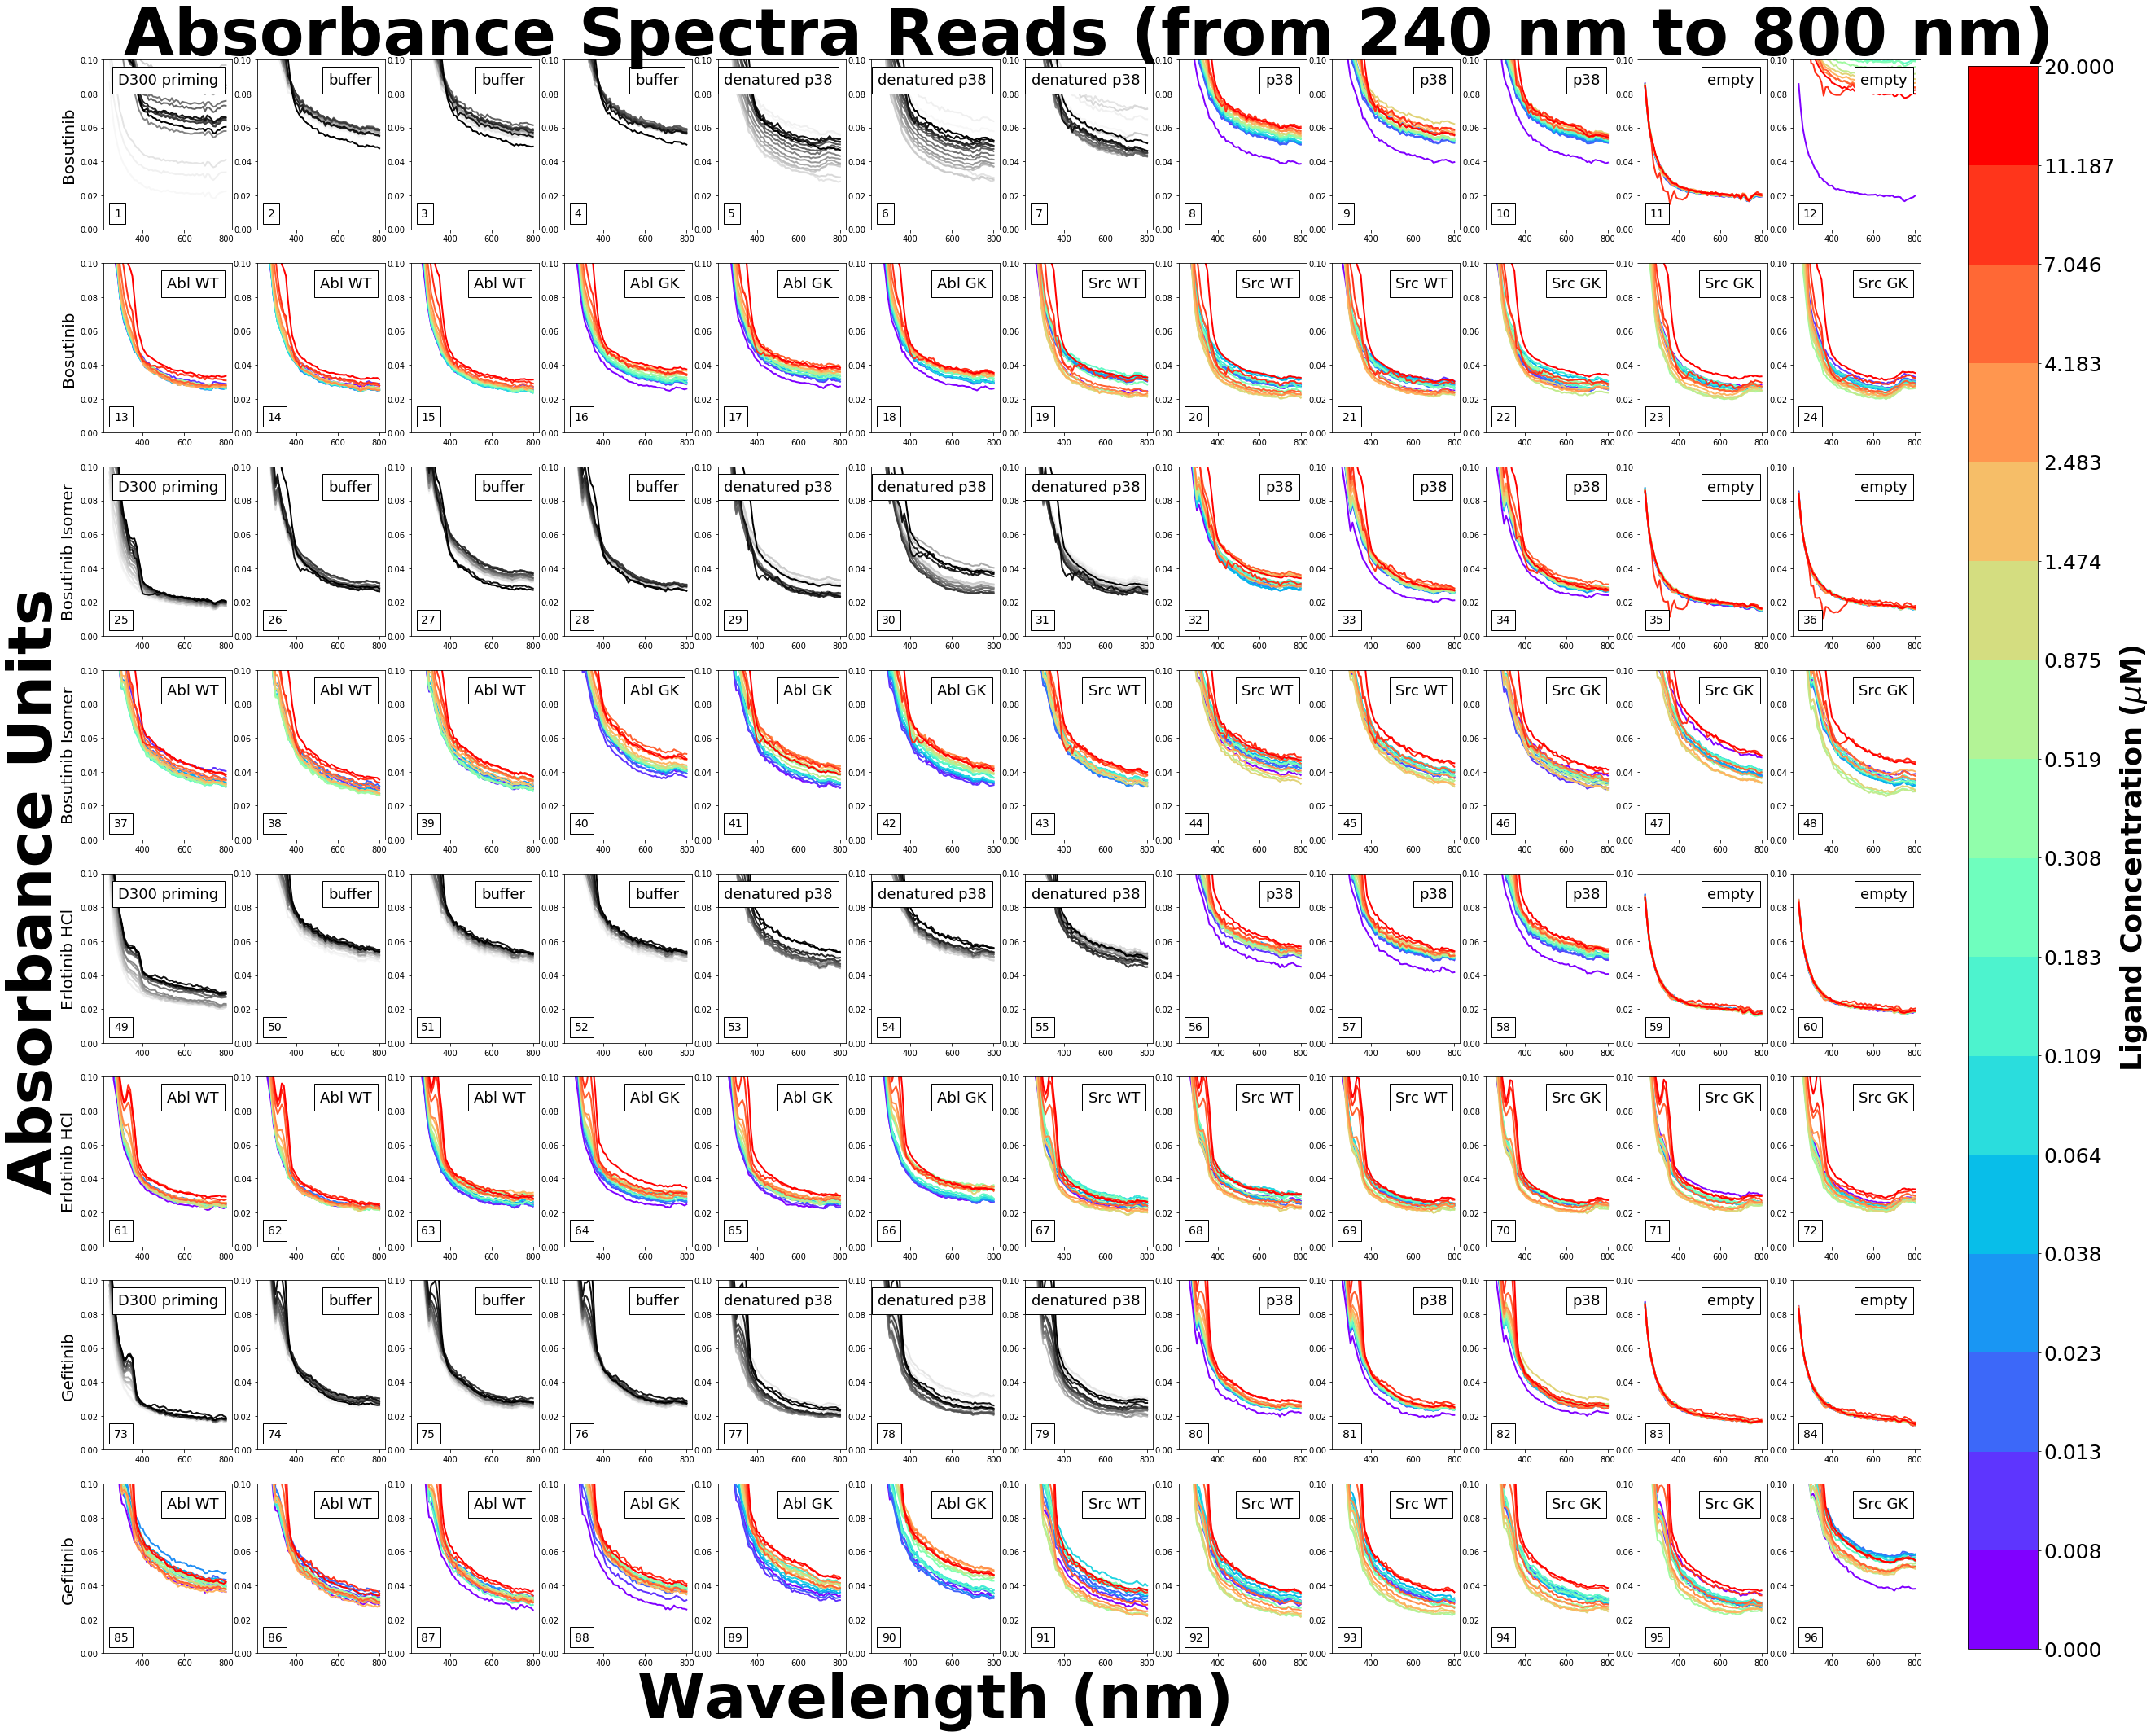

In [8]:
# plot absorbance

nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])


label = 'ex280_scan_top_gain100'
title = 'Absorbance Spectra Reads (from 240 nm to 800 nm)'

c = list(concentrations)

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            gray = cm.Greys(np.linspace(0,1,17))
            if plate_layout[plate_layout.well == well].name.any() in ['buffer', 'D300 priming', 'denatured p38']:
                 color=cm.Greys(np.linspace(0,1,17))
            else:
                color=cm.rainbow(np.linspace(0,1,17))
            for read, c in zip(data[row_index,col_index,:], color):
                plt.plot(x_values, read, c=c, linewidth=2);

            plt.ylim(0,0.1)
            plt.tick_params(axis='both', which='major', labelsize=10)
            
            # label subplots with contents of wells and index # 
            if len(list(plate_layout[plate_layout.well == well].name)) > 0:
                anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
                ax.add_artist(anchored_text)
            if index == 89:
                 plt.xlabel('Wavelength (nm)', fontsize=75, fontweight='bold')
            if index == 6:
                plt.title(title, loc='center', fontsize=80, fontweight='bold')
            if index == 85:
                axis = plt.gca()
                plt.ylabel('Absorbance Units', fontsize=75, fontweight='bold')
                axis.yaxis.set_label_coords(-1.5,4.5)
                
            # ligand labels
            if index == 12 or index == 0:
                plt.ylabel('Bosutinib', fontsize=20)
            if index == 24 or index == 36:
                plt.ylabel('Bosutinib Isomer', fontsize=20)
            if index == 48 or index == 60:
                plt.ylabel('Erlotinib HCl', fontsize=20)
            if index == 72 or index == 84:
                plt.ylabel('Gefitinib', fontsize=20)


            index += 1
            anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
            ax.add_artist(anchored_text2)
            
            

cax = fig.add_axes([.92, 0.127, 0.03, 0.75])

micro_concentrations = np.multiply(concentrations, 1e6)
norm = matplotlib.colors.BoundaryNorm(micro_concentrations, cm.rainbow.N)
conc_labels = ['{0:.3f}'.format(x) for x in micro_concentrations]
cb = matplotlib.colorbar.ColorbarBase(cax, cmap='rainbow', norm=norm, ticks=micro_concentrations, boundaries=micro_concentrations)
cb.set_label('Ligand Concentration ($\mu$M)', fontsize=35, fontweight='bold')
cb.ax.tick_params(labelsize=25)
cb.ax.set_yticklabels(conc_labels)

fig.savefig('20181211_single_well_absorbance_spectra.pdf', bbox_inches='tight', dpi=300)

## Plot absorbance at 280, 350, and 480 nm across concentrations

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
/Applications/miniconda3/envs/assaytools/lib

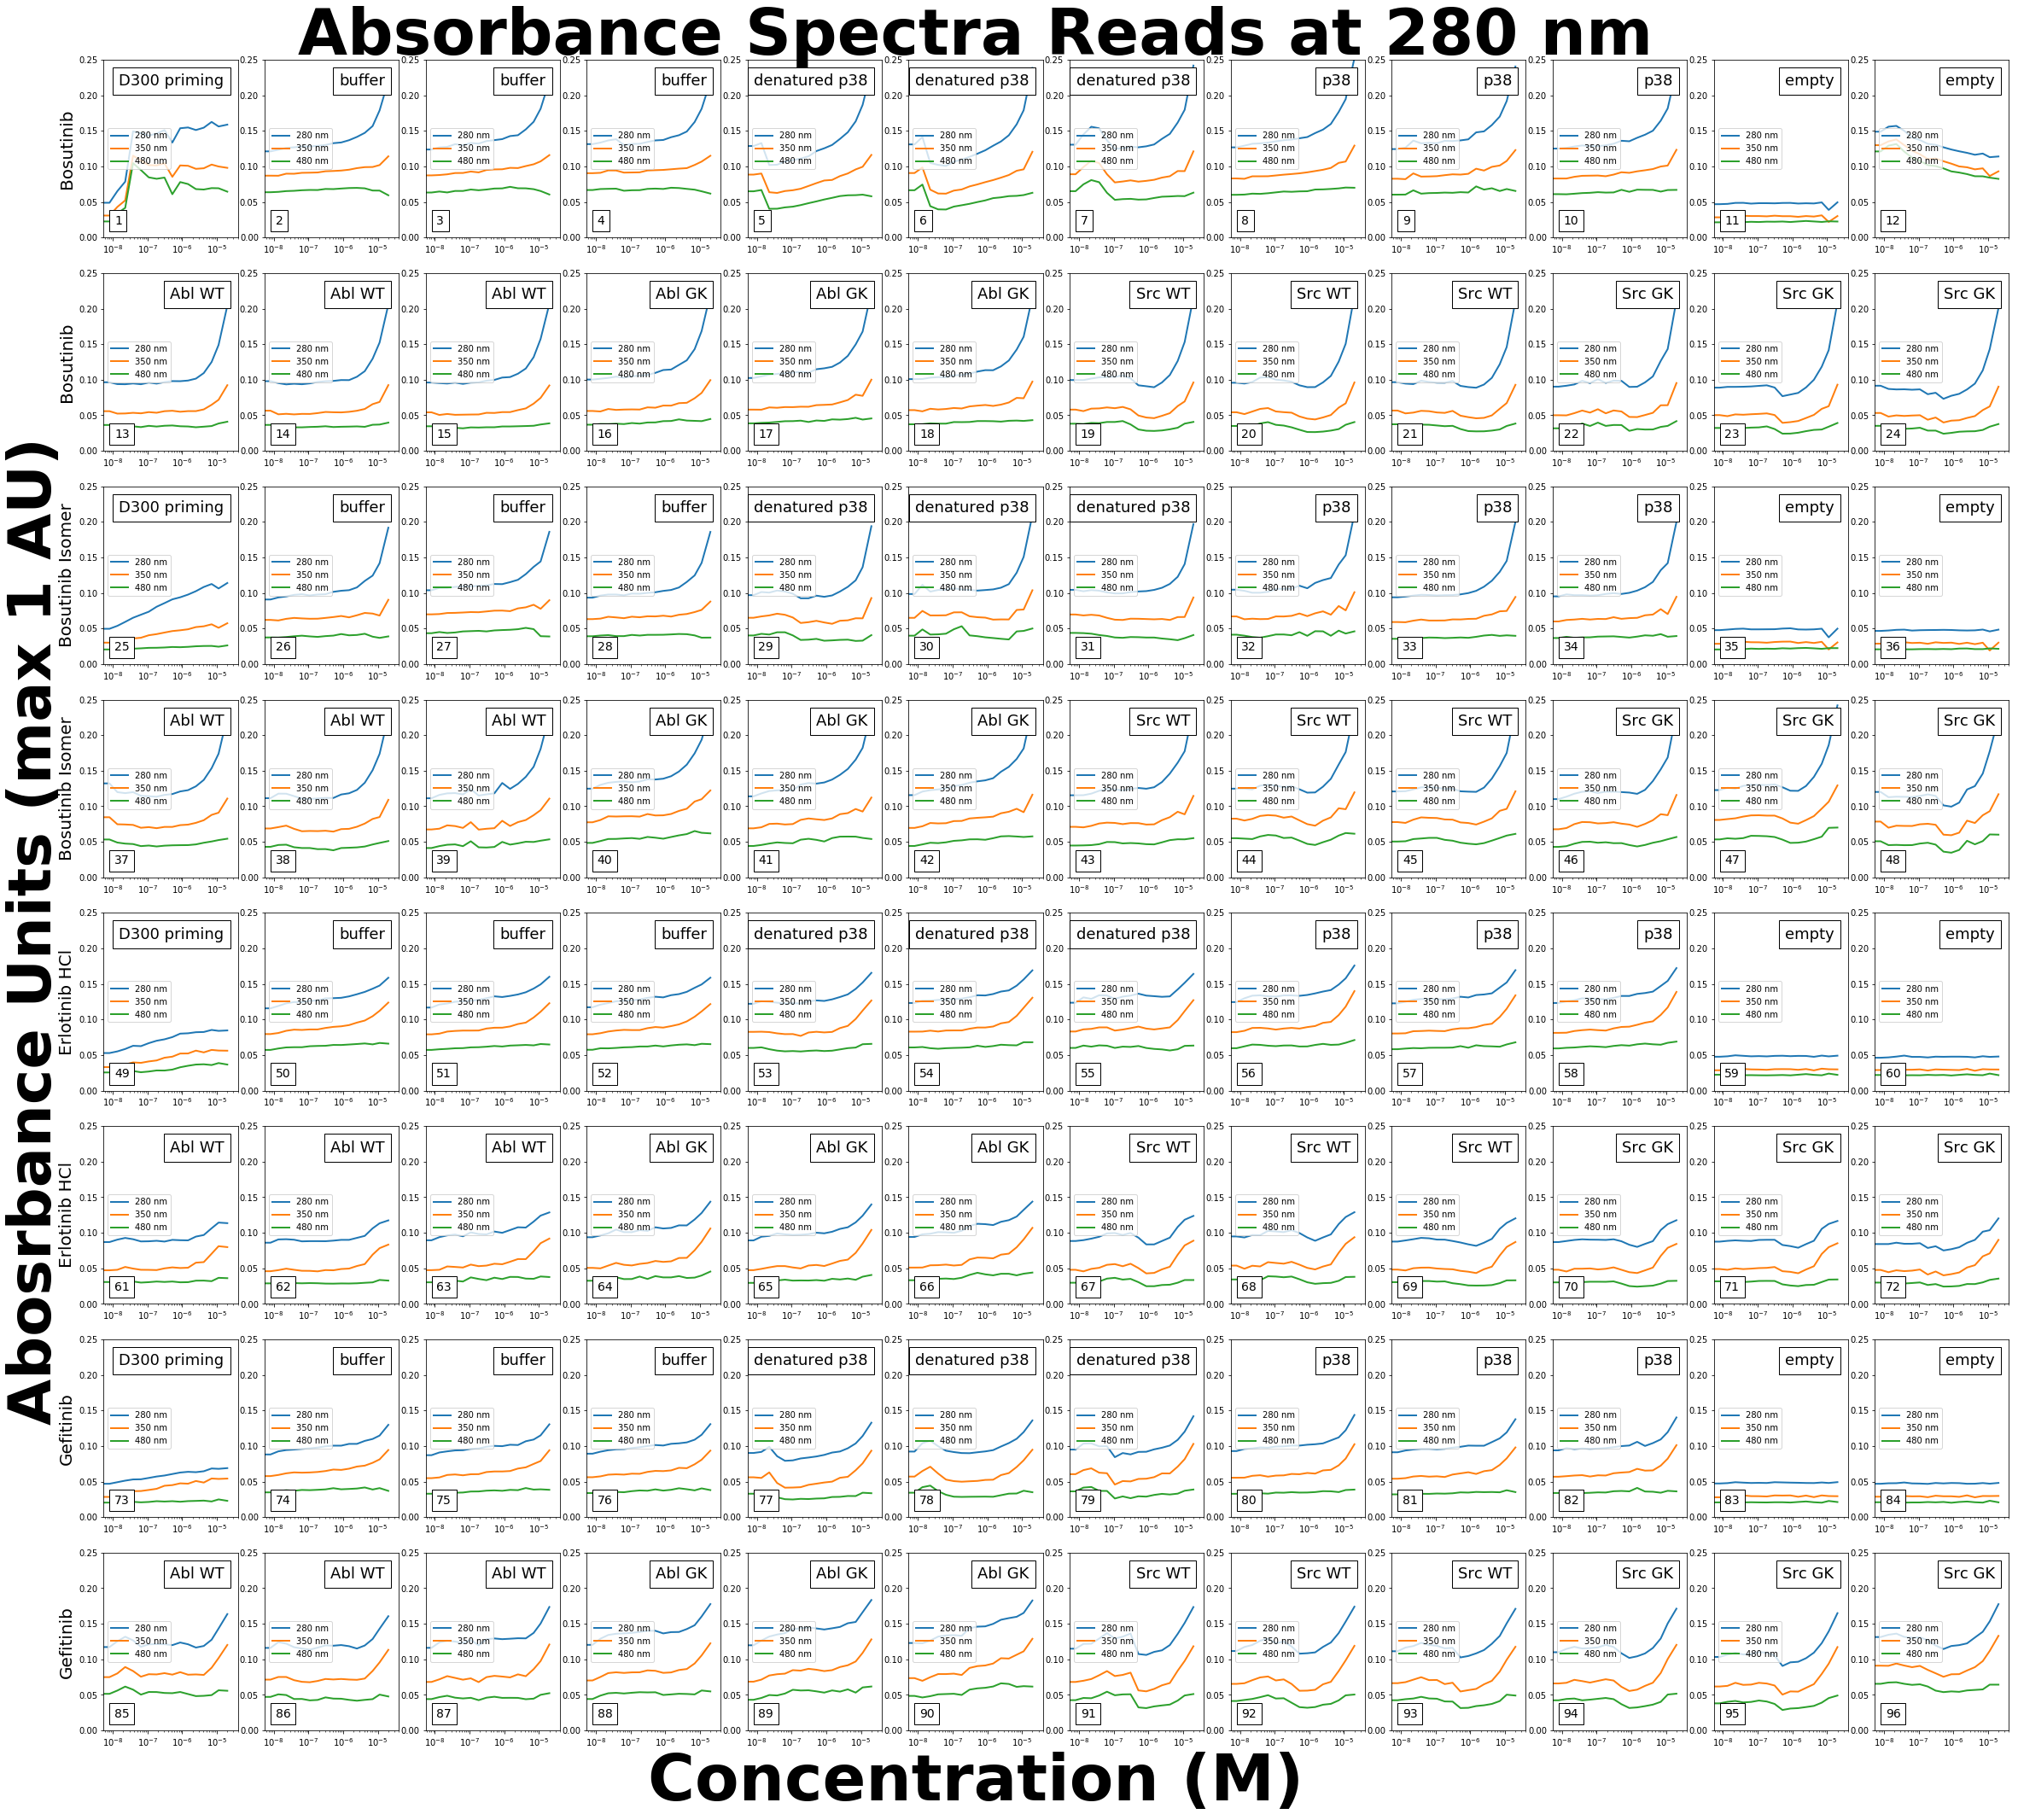

In [9]:
nrows = 8
ncols = 12
index = 0
fig, axes = plt.subplots(nrows, ncols, figsize=[40,36])

label = 'abs_scan'
title = 'Absorbance Spectra Reads at 280 nm'

x_values = concentrations

for row_index in range(nrows):
    for col_index in range(ncols):
        row = '%c' % (ord('A')+row_index)
        col = '%d' % (col_index+1)
        well = row + col
        x_values = concentrations
        abs_values_280 = [list(reads[i][label][well].values())[4] for i in range(nreads)]
        abs_values_280 = [float(i) for i in abs_values_280]
        abs_values_350 = [list(reads[i][label][well].values())[11] for i in range(nreads)]
        abs_values_350 = [float(i) for i in abs_values_350]
        abs_values_480 = [list(reads[i][label][well].values())[24] for i in range(nreads)]
        abs_values_480 = [float(i) for i in abs_values_480]
        if len(list(plate_layout[plate_layout.well == well].name)) > 0:
            ax = plt.subplot(nrows,ncols,index+1)
            
            plt.semilogx(x_values, abs_values_280, linewidth=2, label='280 nm')
            plt.semilogx(x_values, abs_values_350, linewidth=2, label='350 nm')
            plt.semilogx(x_values, abs_values_480, linewidth=2, label='480 nm')
            plt.legend(loc='center left')
            
            plt.xlim(0,4e-5)
            plt.ylim(0, 0.25)
            plt.tick_params(axis='both', which='major', labelsize=10)
           
            # label subplots with contents of wells and index # 
            if len(list(plate_layout[plate_layout.well == well].name)) > 0:
                anchored_text = AnchoredText('%s' % list(plate_layout[plate_layout.well == well].name)[0].split('_')[0], loc=1, prop=dict(size=18))
                ax.add_artist(anchored_text)
            if index == 89:
                 plt.xlabel('Concentration (M)', fontsize=75, fontweight='bold')
            if index == 5:
                plt.title(title, loc='center', fontsize=75, fontweight='bold')
            if index == 85:
                axis = plt.gca()
                plt.ylabel('Abosrbance Units (max 1 AU)', fontsize=70, fontweight='bold')
                axis.yaxis.set_label_coords(-1.5,4.5)
                
            # ligand labels
            if index == 12 or index == 0:
                plt.ylabel('Bosutinib', fontsize=20)
            if index == 24 or index == 36:
                plt.ylabel('Bosutinib Isomer', fontsize=20)
            if index == 48 or index == 60:
                plt.ylabel('Erlotinib HCl', fontsize=20)
            if index == 72 or index == 84:
                plt.ylabel('Gefitinib', fontsize=20)

            index += 1
            anchored_text2 = AnchoredText('%s' % (index),  loc=3, prop=dict(size=14))
            ax.add_artist(anchored_text2)

            
fig.savefig('20181211_single_well_absorbance_spectra_280_350_480nm.pdf', bbox_inches='tight', dpi=300)